In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from tqdm import tqdm

In [2]:
# helper funcs
def plot_helper_2d(xy_list):
    xs = [x[0] for x in xy_list]
    ys = [x[1] for x in xy_list]
    plt.plot(xs, ys, 'x')
    plt.show()


def plot_helper_1d(x_list):
    plt.plot(x_list, np.zeros(len(x_list)), 'x')
    plt.show()


def gaussian_sampler(mean, cov, num_samples):
    return np.random.multivariate_normal(mean, cov, num_samples)


def projection(x, w):
    return x[0]*w[0] + x[1]*w[1]


def batch_projection(xs, w):
    return torch.sum(xs * w, dim=1)


def rotate(w, angle):
    A = np.array(w)
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    A = np.dot(R, A)
    return A


def get_ws(num_ws=360):
    w0 = [1, 0]
    ws = []
    for i in range(num_ws):
        cur_angle = 360 / num_ws * i
        ws.append(rotate(w0, cur_angle))
    return ws

In [3]:
# train model
def get_batch_size_samples(batch_size, sample_data, seed=0):
    np.random.seed(seed=seed)
    np.random.shuffle(sample_data)
    batch_samples = []
    for i in range(int(len(sample_data)/batch_size)):
        batch_samples.append(sample_data[i*batch_size:(i+1)*batch_size])
    return batch_samples


def get_batch_size_inputs(num_batches, batch_size, seed=0):
    np.random.seed(seed=seed)
    batch_inputs = []
    all_inputs = np.random.rand(num_batches, batch_size)
    for i in range(num_batches):
        batch_inputs.append(all_inputs[i, :])
    return batch_inputs


def prepare_batch(batch_size, sample_data):
    batch_samples = get_batch_size_samples(batch_size, sample_data)
    num_batches = len(batch_samples)
    batch_inputs = get_batch_size_inputs(num_batches, batch_size)
    batches = []
    for i in range(num_batches):
        current_samples = torch.tensor(batch_samples[i], dtype=torch.float32)
        current_inputs = torch.tensor(batch_inputs[i], dtype=torch.float32)
        batches.append((current_inputs, current_samples))
    return batches

In [4]:
# define model
class FF(nn.Module):
    def __init__(self, input_dim, num_layers, hidden_dim, output_dim, actv=nn.ReLU()):
        super(FF, self).__init__()
        self.fcin = nn.Linear(input_dim, hidden_dim)
        self.fcout = nn.Linear(hidden_dim, output_dim)
        fc_layers = []
        for _ in range(num_layers):   
            fc_layers.append(nn.Linear(hidden_dim, hidden_dim))
            fc_layers.append(nn.ReLU())
        self.fcmid = nn.Sequential(*fc_layers)
        self.actv = actv

    def forward(self, x):
        x = self.actv(self.fcin(x))
        x = self.fcmid(x)
        x = self.fcout(x)
        return x

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = FF(1, 4, 128, 2)
    
    def forward(self, input):
        return self.main(input)


class Discriminator(nn.Module):
    def __init__(self, batch_size):
        super(Discriminator, self).__init__()
        self.main = FF(2*batch_size, 4, 64, 1)
    
    def forward(self, input):
        return self.main(input) 

In [6]:
iterations = 20

device = torch.device("cuda")
batch_size = 512
lr = 1e-3
num_epochs = 100

num_samples = 50000
mean = [1, 4]
cov = [[1, 0], [0, 1]]
data = gaussian_sampler(mean, cov, num_samples)
batches = prepare_batch(batch_size, data)

netG = Generator().to(device)
netD = Discriminator(batch_size).to(device)

criterion = nn.BCELoss()
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr)
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr)


real_label = 1.
fake_label = 0.

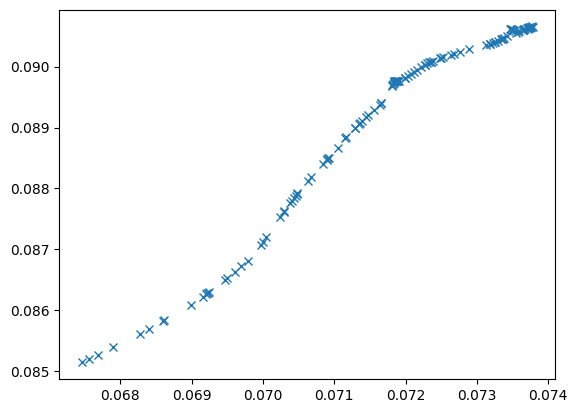

tensor(4.7892, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.4094, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


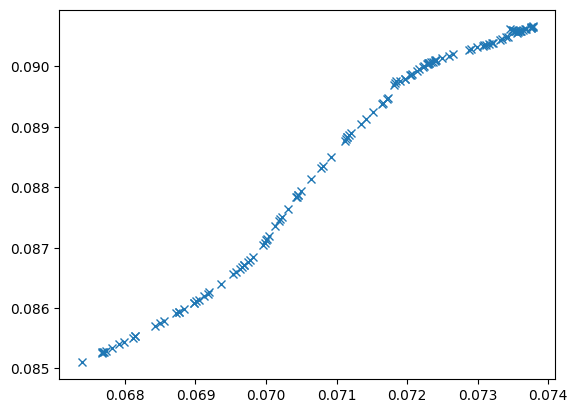

tensor(4.6880, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3980, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


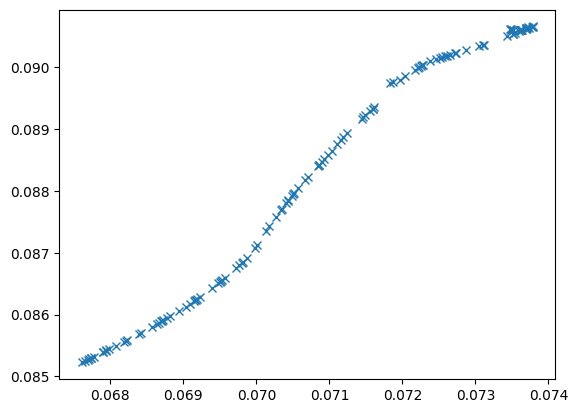

tensor(4.5969, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3863, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


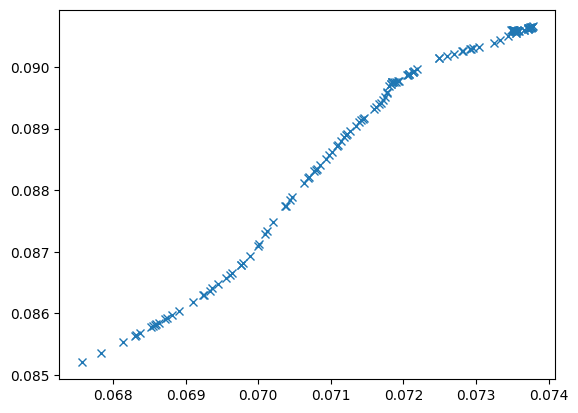

tensor(4.5166, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3742, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


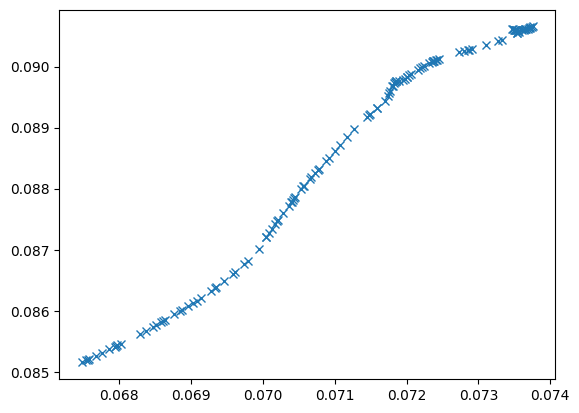

tensor(4.4479, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3618, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


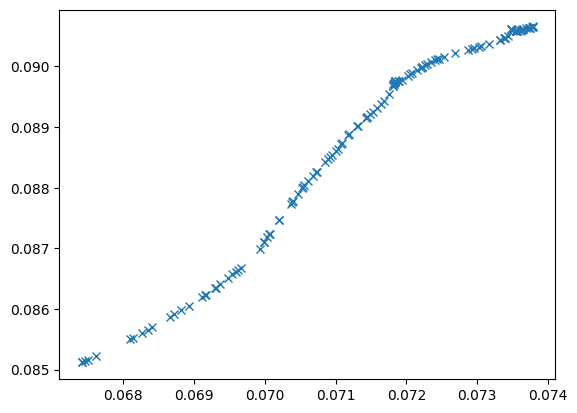

tensor(4.3861, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3492, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


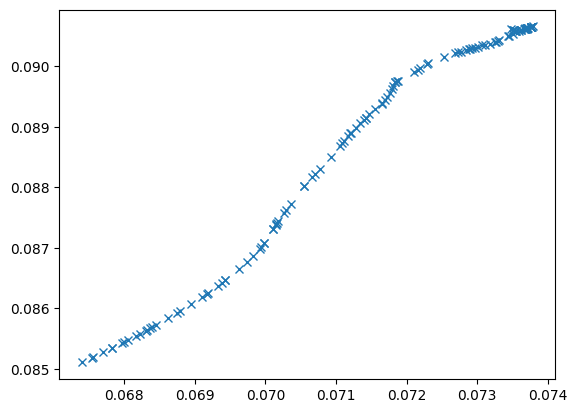

tensor(4.3274, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3366, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


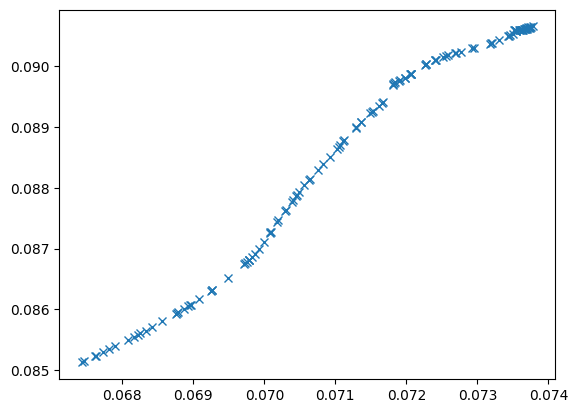

tensor(4.2681, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3241, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


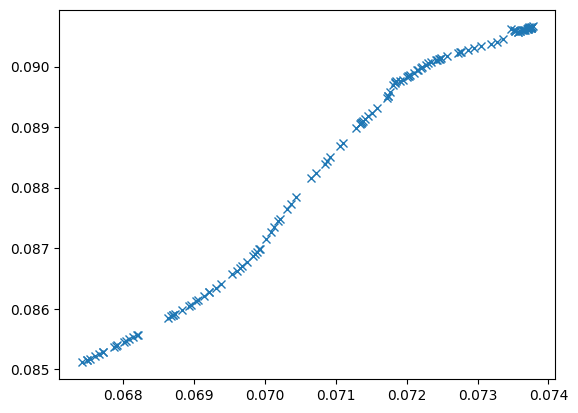

tensor(4.2089, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.3117, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


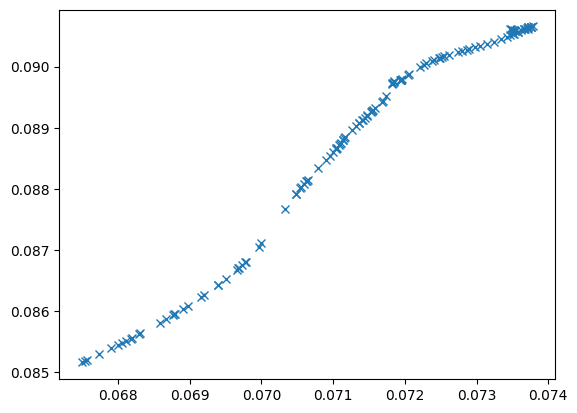

tensor(4.1526, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2995, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


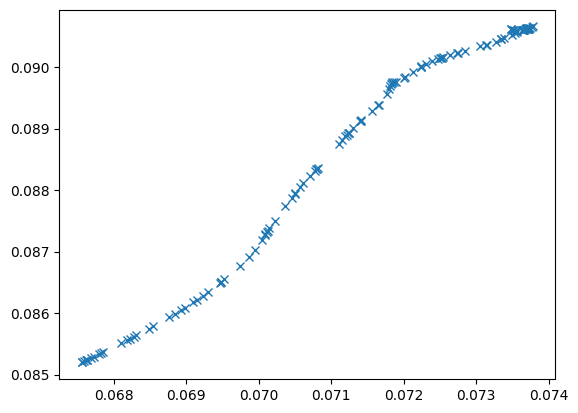

tensor(4.0981, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2876, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


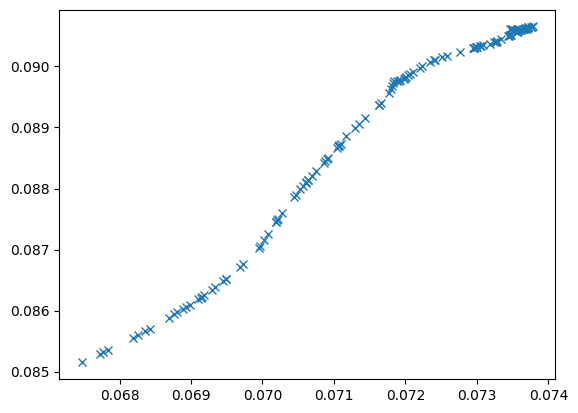

tensor(4.0444, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2762, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


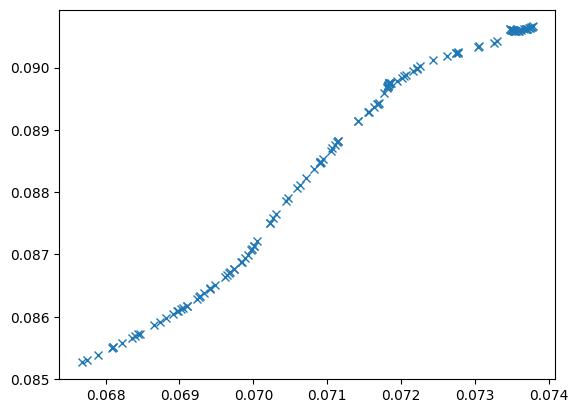

tensor(3.9914, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2647, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


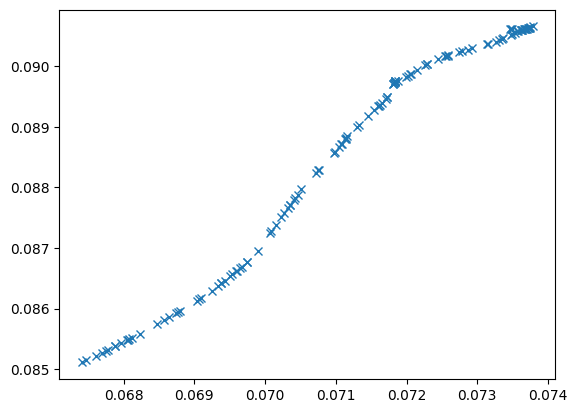

tensor(3.9379, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2532, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


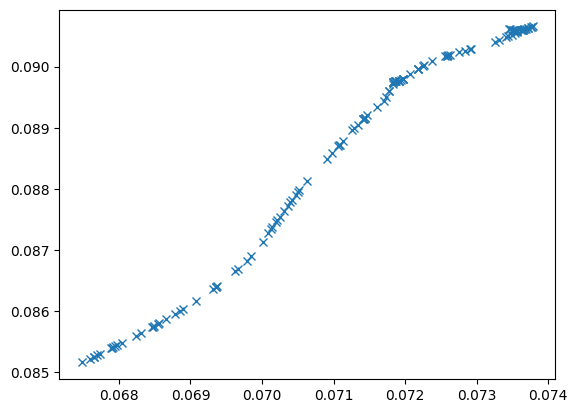

tensor(3.8836, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2418, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


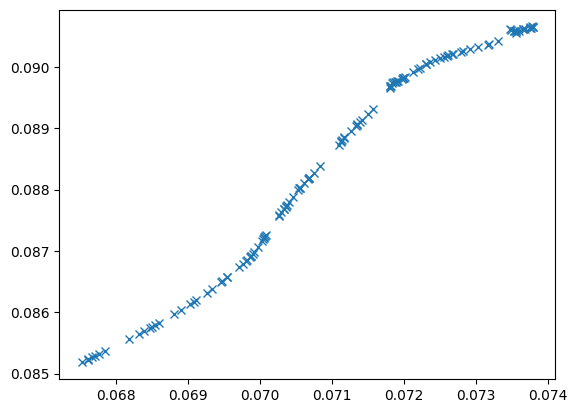

tensor(3.8291, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2306, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


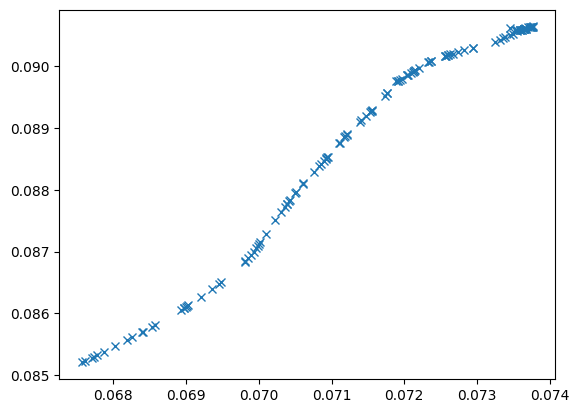

tensor(3.7744, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2187, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


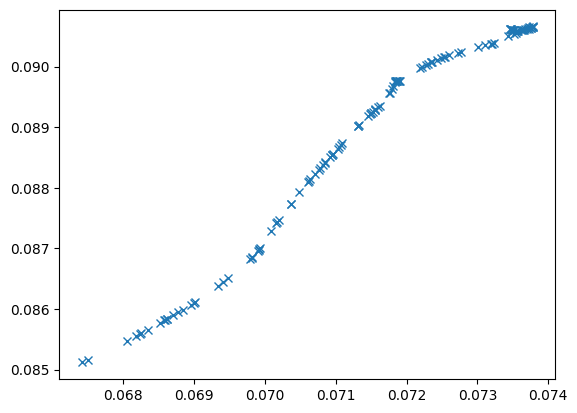

tensor(3.7181, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.2067, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


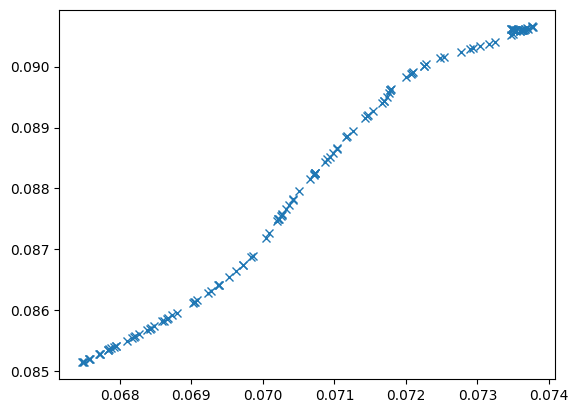

tensor(3.6607, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1947, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


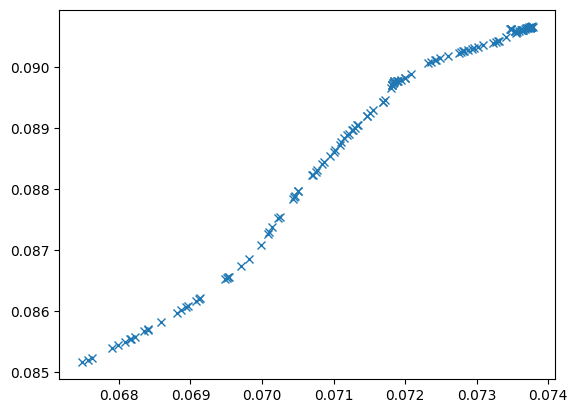

tensor(3.6020, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1829, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


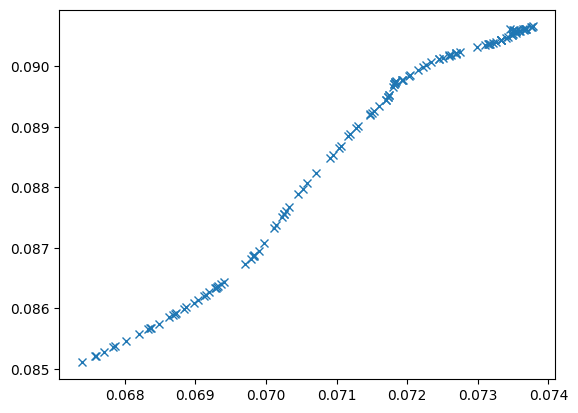

tensor(3.5421, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1712, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


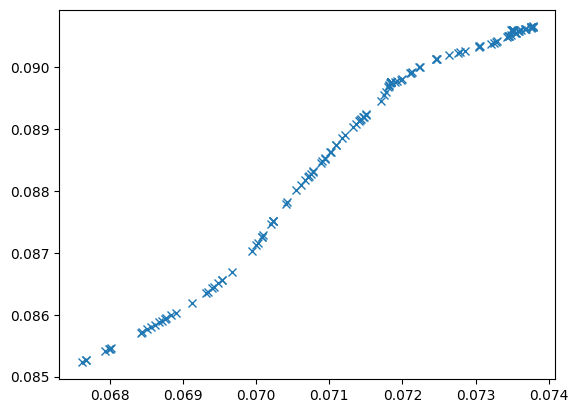

tensor(3.4817, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1598, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


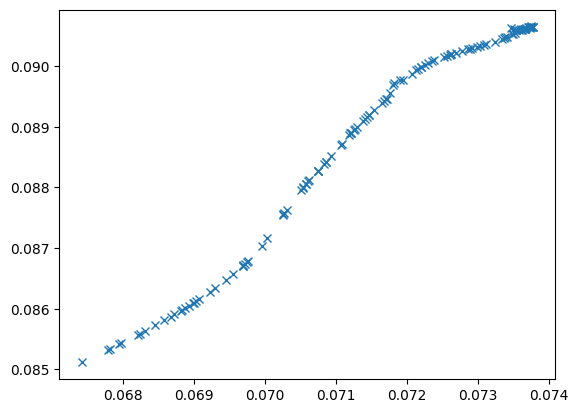

tensor(3.4214, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1485, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


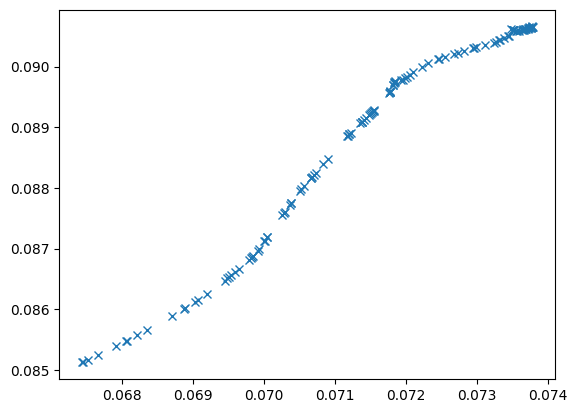

tensor(3.3608, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1372, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


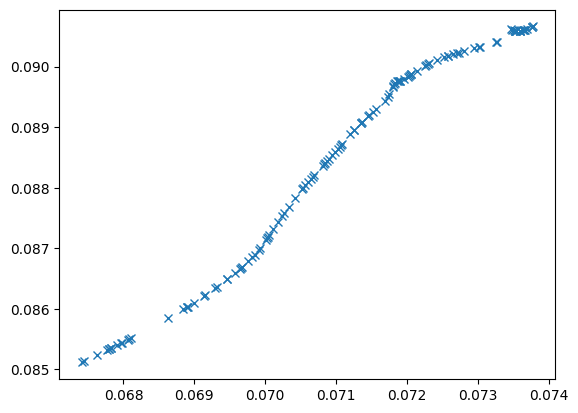

tensor(3.2999, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1257, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


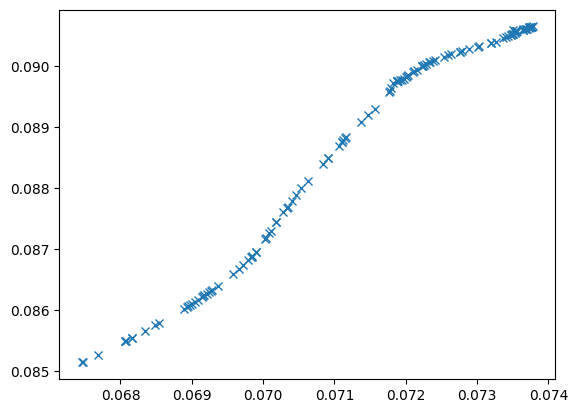

tensor(3.2386, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1143, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


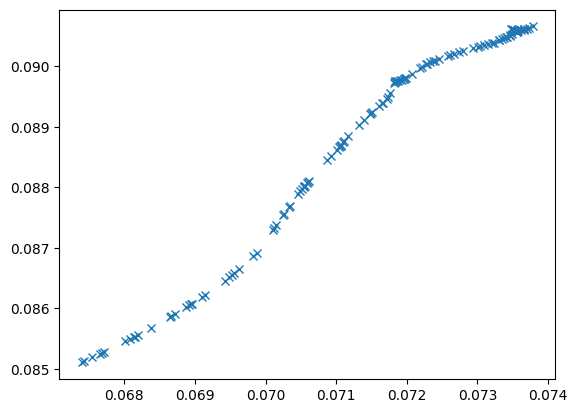

tensor(3.1779, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.1029, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


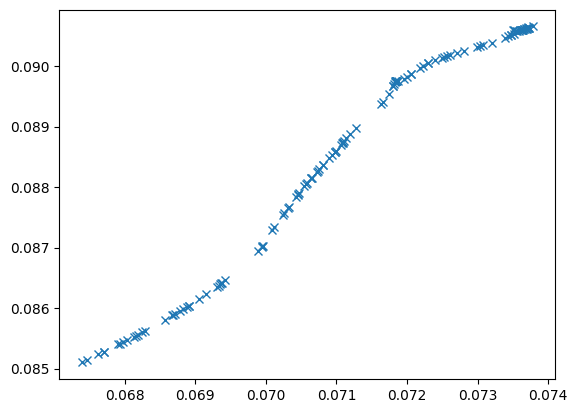

tensor(3.1180, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0917, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


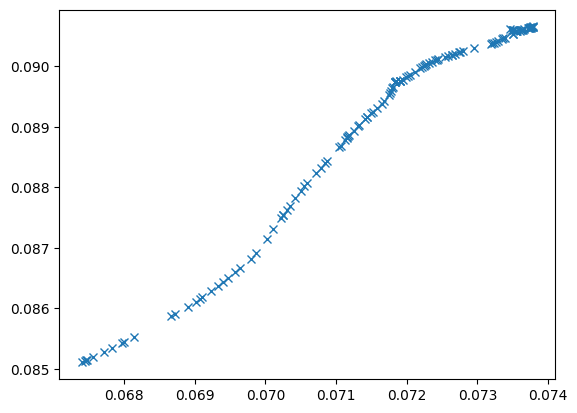

tensor(3.0589, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0811, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


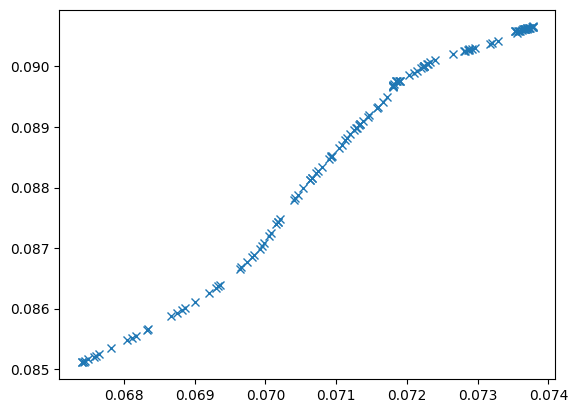

tensor(3.0010, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0704, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


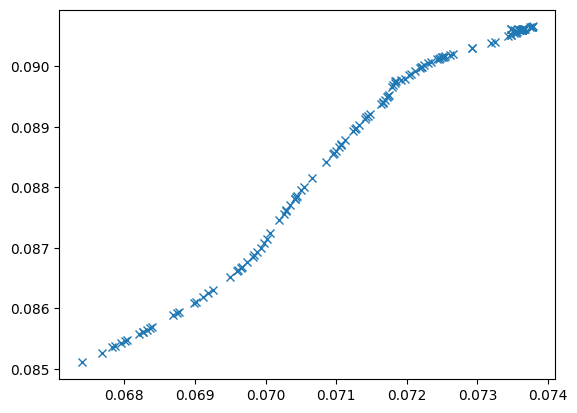

tensor(2.9435, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0598, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


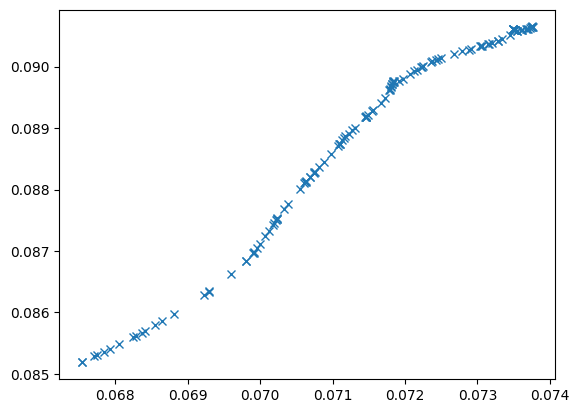

tensor(2.8864, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0490, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


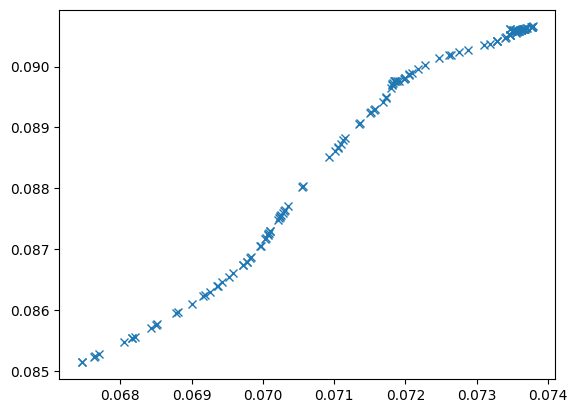

tensor(2.8293, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0377, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


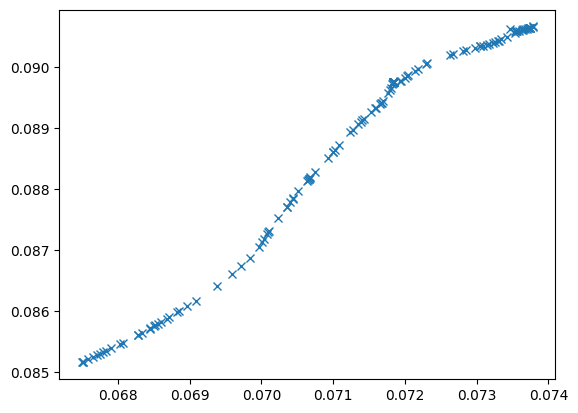

tensor(2.7718, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0264, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


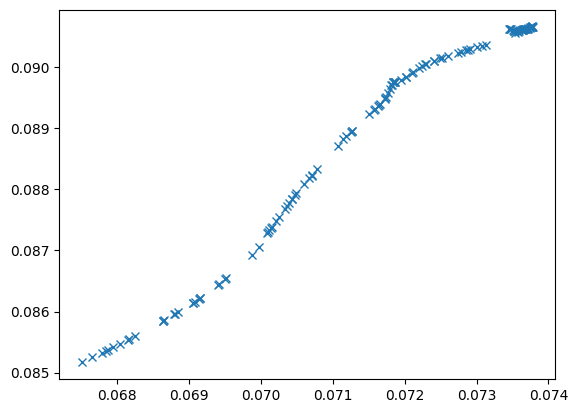

tensor(2.7143, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0150, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


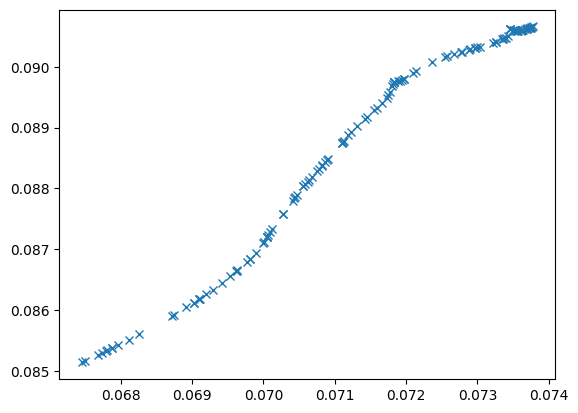

tensor(2.6569, device='cuda:0', grad_fn=<AddBackward0>)
tensor(2.0035, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


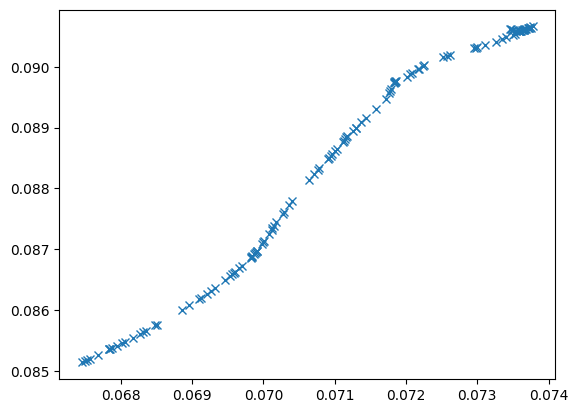

tensor(2.5994, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9919, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


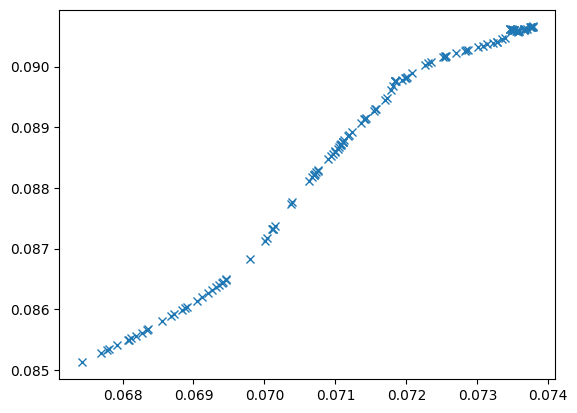

tensor(2.5419, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9802, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


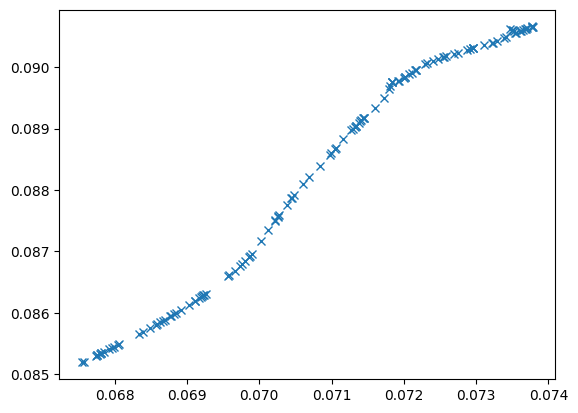

tensor(2.4846, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9685, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


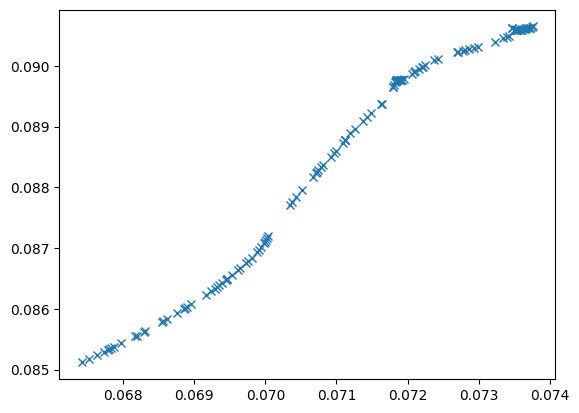

tensor(2.4274, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9566, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


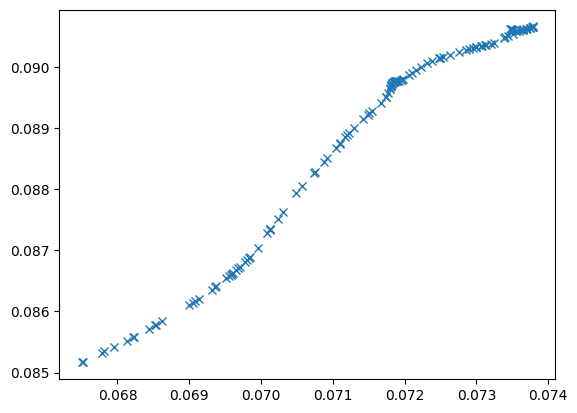

tensor(2.3702, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9443, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


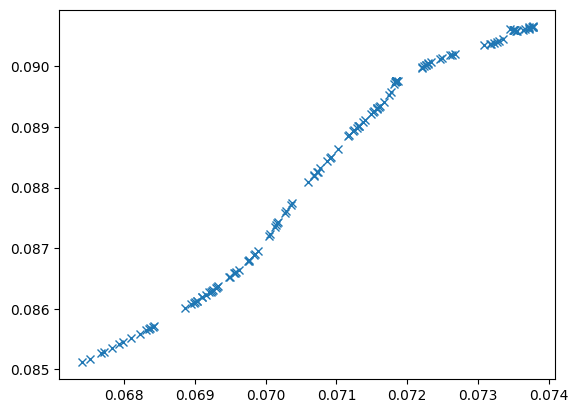

tensor(2.3128, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9323, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


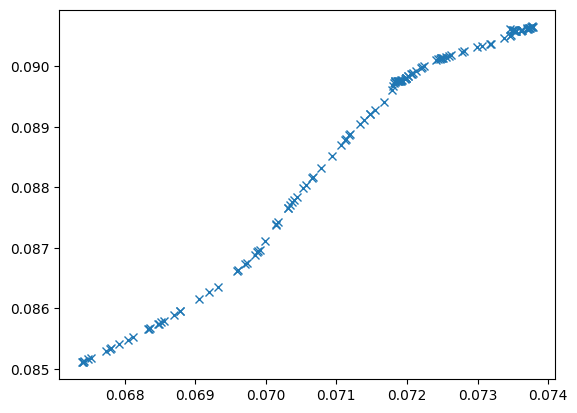

tensor(2.2558, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9203, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


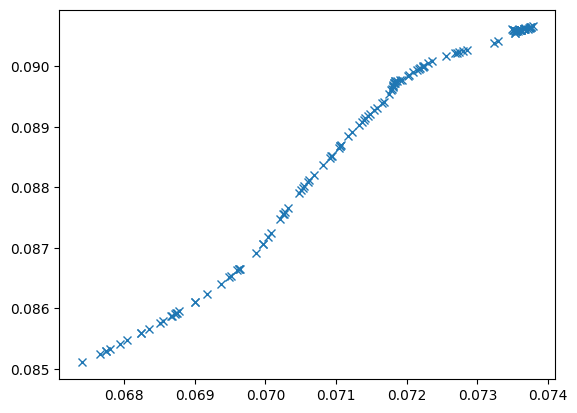

tensor(2.1990, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.9082, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


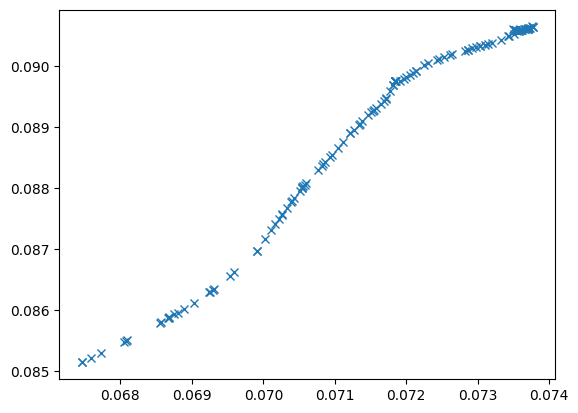

tensor(2.1422, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.8959, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


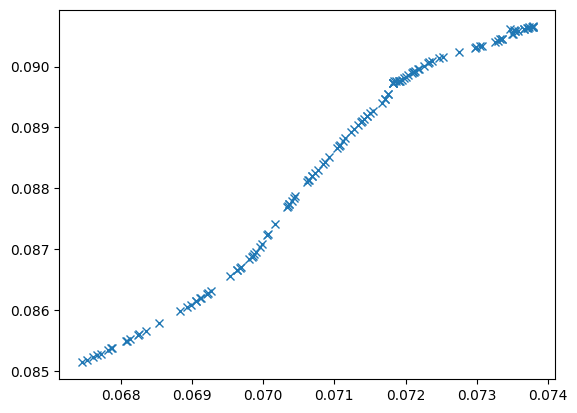

tensor(2.0852, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.8835, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


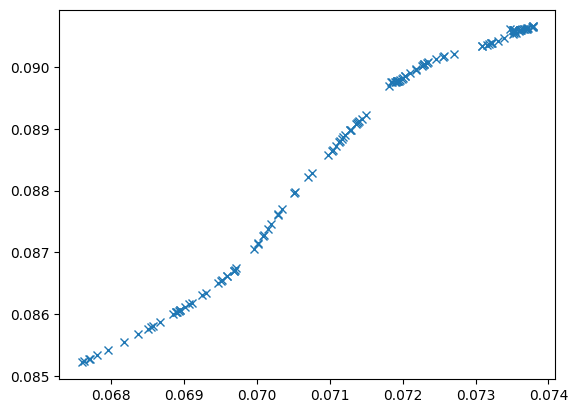

tensor(2.0282, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.8711, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


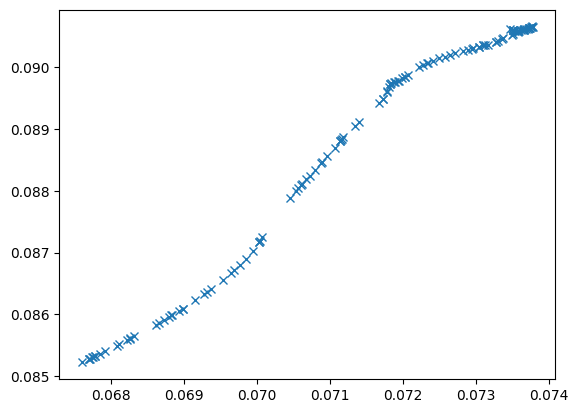

tensor(1.9714, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.8594, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


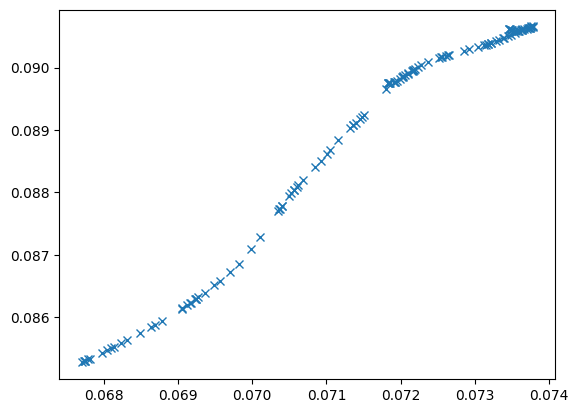

tensor(1.9157, device='cuda:0', grad_fn=<AddBackward0>)
tensor(1.8475, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


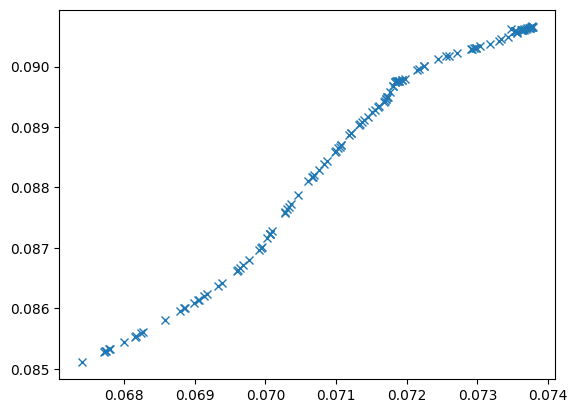

../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [67,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [68,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [71,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [72,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [77,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [78,0,0] Assertion `input_val >= zero && input_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [0,0,0], thread: [84,0,0] Assertion `input_val >= zero && input_val <= one` 

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [7]:
for epoch in range(num_epochs):
    lossesG = []
    lossesD = []
    
    netG.eval()
    samples = netG(torch.rand(128, device=device)[:, None])
    samples = samples.detach().cpu().numpy()
    # plot_helper_2d(samples)
    netG.train()
    
    # train D
    netD.zero_grad()
    fakes = []
    trues = []
    for batch in batches:
        x, y = batch
        x = x.to(device)
        y = y.to(device)
        x = x[:, None]
        fake = netG(x)
        fakes.append(fake.view(-1).detach())
        trues.append(y.view(-1))
    fakes = torch.stack(fakes, dim=0)
    trues = torch.stack(trues, dim=0)
    true_label = torch.full((len(fakes),), real_label, dtype=torch.float, device=device)
    fake_label = torch.full((len(trues),), real_label, dtype=torch.float, device=device)
    # real / fake
    output_true = netD(trues).view(-1)
    lossD_real = criterion(output_true, true_label)
    output_fake = netD(fakes).view(-1)
    lossD_fake = criterion(output_fake, fake_label)
    lossD = lossD_real + lossD_fake
    lossD.backward()
    optimizerD.step()
    
    # train G
    netG.zero_grad()
    output = netD(fakes).view(-1)
    lossG = criterion(output, true_label)
    lossG.backward()
    optimizerG.step()
    print(lossD)
    print(lossG)
    
    